In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
#reading Dataset
ADT = pd.read_csv('Autism Dataset for Toddlers.csv',index_col=['Case_No'])
ADT.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
Case_No,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,1,28.0,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36.0,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36.0,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24.0,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20.0,9,f,White European,no,yes,family member,Yes


In [ ]:
ADT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 1 to 1054
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1                      1054 non-null   int64  
 1   A2                      1054 non-null   int64  
 2   A3                      1054 non-null   int64  
 3   A4                      1054 non-null   int64  
 4   A5                      1054 non-null   int64  
 5   A6                      1054 non-null   int64  
 6   A7                      1054 non-null   int64  
 7   A8                      1054 non-null   int64  
 8   A9                      1054 non-null   int64  
 9   A10                     1054 non-null   int64  
 10  Age_Mons                1050 non-null   float64
 11  Qchat-10-Score          1054 non-null   int64  
 12  Sex                     1049 non-null   object 
 13  Ethnicity               1048 non-null   object 
 14  Jaundice                1050 non-null   

In [ ]:
ADT.isna().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  4
Qchat-10-Score            0
Sex                       5
Ethnicity                 6
Jaundice                  4
Family_mem_with_ASD       4
Who completed the test    4
Class/ASD Traits          0
dtype: int64

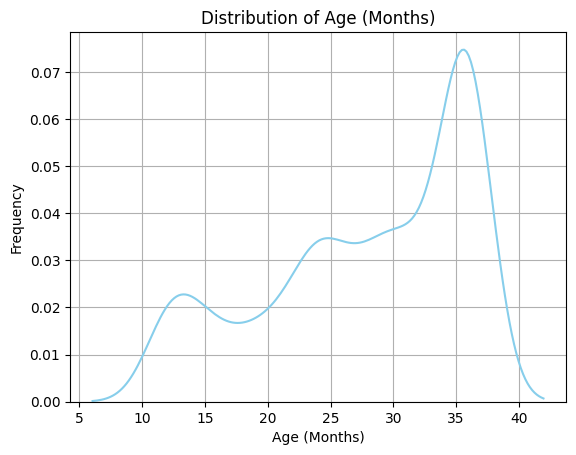

In [ ]:
# Visualize the spread of Age_Mons column
sns.kdeplot(data=ADT, x='Age_Mons', color='skyblue')
plt.title('Distribution of Age (Months)')
plt.xlabel('Age (Months)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# From Above KDE plot we can see that data distribution is negatively skewed so to fill missing value with mean or median would be not appropriate so we would fill it with mode
col_to_fill = ['Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test']
for col in col_to_fill :
  ADT[col].fillna(ADT[col].mode()[0],inplace=True)
  print("number of missing values in column ",col,ADT[col].isna().sum())

number of missing values in column  Age_Mons 0
number of missing values in column  Sex 0
number of missing values in column  Ethnicity 0
number of missing values in column  Jaundice 0
number of missing values in column  Family_mem_with_ASD 0
number of missing values in column  Who completed the test 0


In [ ]:
ADT.isna().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

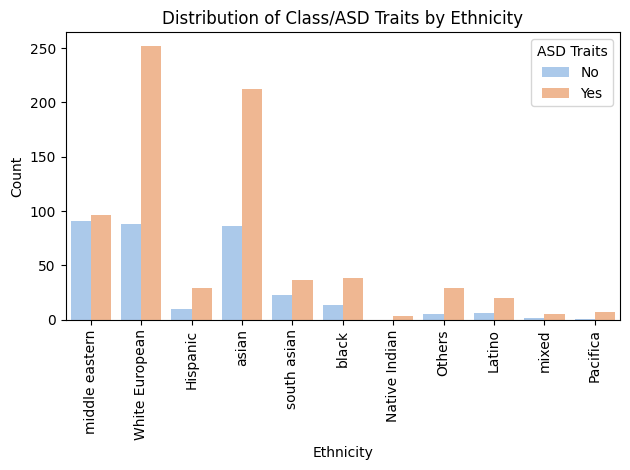

In [ ]:
sns.countplot(data=ADT, x='Ethnicity', hue='Class/ASD Traits ', palette='pastel')
plt.title('Distribution of Class/ASD Traits by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='ASD Traits', loc='upper right')
plt.tight_layout()
plt.show()

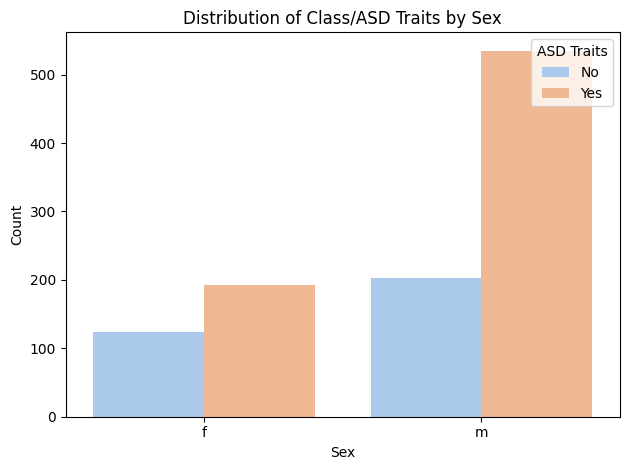

In [ ]:
sns.countplot(data=ADT, x='Sex', hue='Class/ASD Traits ', palette='pastel')
plt.title('Distribution of Class/ASD Traits by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='ASD Traits', loc='upper right')
plt.tight_layout()
plt.show()

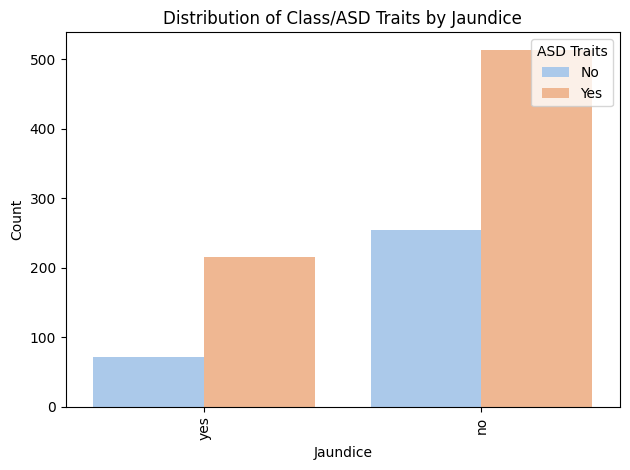

In [ ]:
sns.countplot(data=ADT, x='Jaundice', hue='Class/ASD Traits ', palette='pastel')
plt.title('Distribution of Class/ASD Traits by Jaundice')
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='ASD Traits', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
ADT.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Who completed the test'], axis=1, inplace=True)
ADT.head()

,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
Case_No,,,,,,,
1,28.0,3,f,middle eastern,yes,no,No
2,36.0,4,m,White European,yes,no,Yes
3,36.0,4,m,middle eastern,yes,no,Yes
4,24.0,10,m,Hispanic,no,no,Yes
5,20.0,9,f,White European,no,yes,Yes


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD','Class/ASD Traits ']
for col in categorical_columns:
    ADT[col] = label_encoder.fit_transform(ADT[col])

# Display the updated DataFrame
ADT.head()

,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
Case_No,,,,,,,
1,28.0,3,0,8,1,0,0
2,36.0,4,1,5,1,0,1
3,36.0,4,1,8,1,0,1
4,24.0,10,1,0,0,0,1
5,20.0,9,0,5,0,1,1


In [ ]:
target = ADT['Class/ASD Traits ']
del ADT['Class/ASD Traits ']

197

Logistic Regression Model:
Actual(Class/ASD Traits)   Predicted(Class/ASD Traits)
1               		1
1               		1
1               		1
0               		0
0               		0

Model Test Accuracy Score :  1.0
Model Validation Loss Score :  0.01643391968321012

Support Vector Machine Model:
Actual(Class/ASD Traits)   Predicted(Class/ASD Traits)
1               		1
1               		1
1               		0
0               		0
0               		0

Model Test Accuracy Score :  0.995260663507109
Model Validation Loss Score :  0.03554844101534836

XGBoost Model:
Actual(Class/ASD Traits)   Predicted(Class/ASD Traits)
1               		1
1               		1
1               		1
0               		0
0               		0

Model Test Accuracy Score :  1.0
Model Validation Loss Score :  0.0031054822556220974



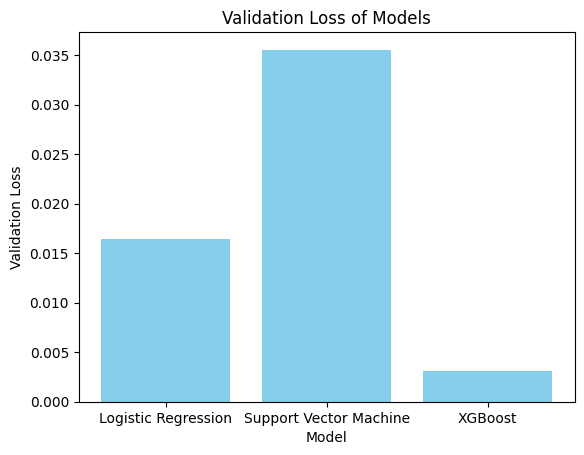

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(ADT, target, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

models = [LogisticRegression(), SVC(probability=True), xgb.XGBClassifier()]
model_names = ['Logistic Regression', 'Support Vector Machine', 'XGBoost']
val_losses = []
test_accuracies = []
i=0
# x = np.random.randint(0,207)
x = 197
print(x)

# Fit models and calculate evaluation metrics
for model in models:
    model.fit(X_train, y_train)
    # Calculate validation loss
    y_prob_val = model.predict_proba(X_val)
    val_loss = log_loss(y_val, y_prob_val)
    val_losses.append(val_loss)
    # Calculate validation accuracy
    y_pred_val = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_val)
    test_accuracies.append(test_accuracy)
    #show results
    print(f"\n{model_names[i]} Model:")
    print("Actual(Class/ASD Traits)   Predicted(Class/ASD Traits)")
    for actual, predicted in zip(y_test[x:x+5], y_pred_val[x:x+5]):
        print(f"{actual}               \t\t{predicted}")
    print()
    print("Model Test Accuracy Score : ",test_accuracy)
    print("Model Validation Loss Score : ",val_loss)
    i+=1

# Plotting validation loss
print()
plt.bar(model_names, val_losses, color='skyblue')
plt.title('Validation Loss of Models')
plt.xlabel('Model')
plt.ylabel('Validation Loss')
plt.show()